In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

import dataplot
import dataprep

In [2]:
# PP
df_1, list_1 = dataprep.plotprep('../Data/LSB/8_2_19/_006_6.xls', 10)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
111 complete cycles after intial discharge
Final cycle only contains charge data


In [3]:
# PEO_PVDF
df_2, list_2 = dataprep.plotprep('../Data/LSB/8_2_19/_005_3.xls', 9)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
161 complete cycles after intial discharge
Final cycle only contains charge data


In [4]:
# PENDI
df_3, list_3 = dataprep.plotprep('../Data/LSB/8_2_19/_007_3.xls', 8)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
104 complete cycles after intial discharge


In [5]:
# PEDOT
df_4, list_4 = dataprep.plotprep('../Data/LSB/8_2_19/_004_2.xls', 3)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
54 complete cycles after intial discharge


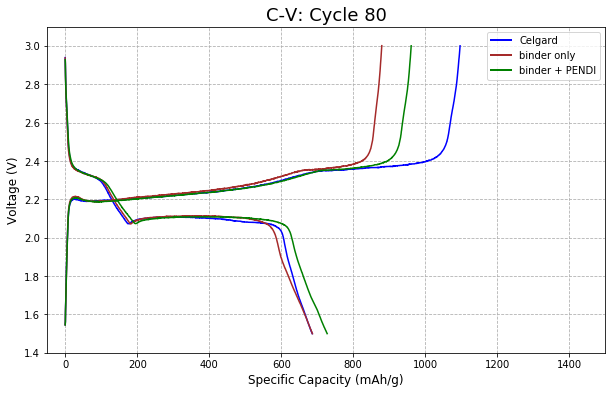

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(-50, 1500)
ax.set_ylim(1.4, 3.1)
ax.set_title('C-V: Cycle 80', fontsize=18)
ax.set_xlabel('Specific Capacity (mAh/g)', fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.grid(which='major', axis='both', linestyle='--')

input_list = [80]

dataplot.cv_plot(ax, df_1, list_1, input_list, plot_color='blue')
dataplot.cv_plot(ax, df_2, list_2, input_list, plot_color='brown')
dataplot.cv_plot(ax, df_3, list_3, input_list, plot_color='green')
# dataplot.cv_plot(ax, df_4, list_4, input_list, plot_color='orange')

custom_lines = [Line2D([0], [0], color='blue', lw=2),
               Line2D([0], [0], color='brown', lw=2),
               Line2D([0], [0], color='green', lw=2)]
#                Line2D([0], [0], color='orange', lw=2)]
ax.legend(custom_lines, ['Celgard', 'binder only', 'binder + PENDI'])#, 'PENDI + PEDOT'])

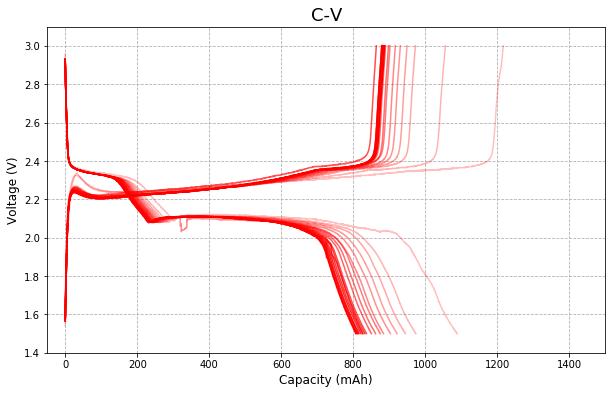

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(-50, 1500)
ax.set_ylim(1.4, 3.1)
ax.set_title('C-V', fontsize=18)
ax.set_xlabel('Capacity (mAh)', fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.grid(which='major', axis='both', linestyle='--')

# input_list = [5, 10, 15]
input_list = list(np.arange(2,20))

dataplot.cv_plot(ax, df_1, list_1, input_list, plot_color='red')

In [8]:
def dqdv_cycle_plot(ax, clean_dataframe, cycle_list, cycle_num, count, step, plot_color):
    """
    docstring
    """
    # extract cycle data
    charge_indeces = cycle_list[cycle_num-1][0]
    discharge_indeces = cycle_list[cycle_num-1][1]
    charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
    discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
    # extract Q and V values
    charge_q = list(charge_df['capacity'])
    charge_v = list(charge_df['voltage'])
    discharge_q = list(discharge_df['capacity'])
    discharge_v = list(discharge_df['voltage'])
    # interpolate q over charge curve
    v_points = np.linspace(min(charge_v), max(charge_v), count)
    q_points = np.interp(v_points, charge_v, charge_q)
    # interpolate q over discharge curve
    v_points2 = np.linspace(min(discharge_v), max(discharge_v), count)
    q_points2 = np.flip(np.interp(np.flip(v_points2), np.flip(discharge_v), np.flip(discharge_q)))
    # calculate charge dQ/dV
    dQ_dV = []
    voltages = []
    for i in range(0, len(q_points)-step):
        if i <= step/2:
            dQ_dV.append(0)
            voltages.append(v_points[i])
        else:
            dQ = q_points[i+int(step/2)] - q_points[i-int(step/2)]
            dV = v_points[i+int(step/2)] - v_points[i-int(step/2)]
            value = dQ/dV
            dQ_dV.append(value)
            voltages.append(v_points[i])
    for i in range(len(q_points)-step, len(q_points)):
            dQ_dV.append(0)
            voltages.append(v_points[i])
    # calculate discharge dQ/dV
    dQ_dV2 = []
    voltages2 = []
    for i in range(0, len(q_points2)-step):
        if i <= step/2:
            dQ_dV2.append(0)
            voltages2.append(v_points[i])
        else:
            dQ = q_points2[i+int(step/2)] - q_points2[i-int(step/2)]
            dV = v_points2[i+int(step/2)] - v_points2[i-int(step/2)]
            value = dQ/dV
            dQ_dV2.append(value)
            voltages2.append(v_points2[i])
    for i in range(len(q_points2)-step, len(q_points2)):
            dQ_dV2.append(0)
            voltages2.append(v_points2[i])
    # plot charge and discharge onto axis
    ax.plot(voltages, dQ_dV, color=plot_color, alpha=0.75)
    ax.plot(voltages2, dQ_dV2, color=plot_color, alpha=0.75)

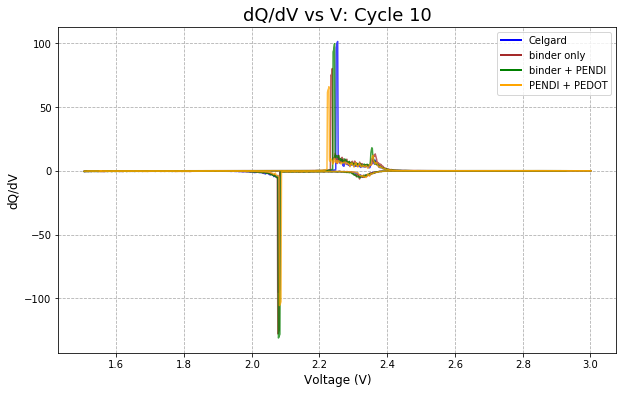

In [9]:
cycle_num = 10
count = 1000
step = 5

fig, ax = plt.subplots(figsize=(10,6))
# ax.set_ylim(-50,50)
ax.set_title('dQ/dV vs V: Cycle {}'.format(cycle_num), fontsize=18)
ax.set_ylabel('dQ/dV', fontsize=12)
ax.set_xlabel('Voltage (V)', fontsize=12)
ax.grid(which='major', axis='both', linestyle='--')
dqdv_cycle_plot(ax, df_1, list_1, cycle_num, count, step, plot_color='blue')
dqdv_cycle_plot(ax, df_2, list_2, cycle_num, count, step, plot_color='brown')
dqdv_cycle_plot(ax, df_3, list_3, cycle_num, count, step, plot_color='green')
dqdv_cycle_plot(ax, df_4, list_4, cycle_num, count, step, plot_color='orange')

custom_lines = [Line2D([0], [0], color='blue', lw=2),
               Line2D([0], [0], color='brown', lw=2),
               Line2D([0], [0], color='green', lw=2),
               Line2D([0], [0], color='orange', lw=2)]
ax.legend(custom_lines, ['Celgard', 'binder only', 'binder + PENDI', 'PENDI + PEDOT'])